In [1]:
#ERP5 Investment strategy
import yfinance as yf
import pandas as pd
import numpy as np


In [8]:
# Load CSV data into a DataFrame
file_path = 'stock_data.CSV'
result_df = pd.read_csv(file_path)
result_df = result_df.dropna()

# Display the DataFrame
result_df

,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,pitroski,freeCashFlow5Yrs,roce5Yrs,ebitdYield,earningsYield,fcfYield,liquidity,fcfToDebt,accrualCF,fcf5YrsYield
0,1,ABB.NS,133841.07,1802.75,1682.83,1242.05,1168.40,1351.48,-3352.01,11001.19,...,9,3026.72,18.23,0.013469333,0.012573345,0.008729757,3.594352e-03,23.854635,0.294748114,0.022614284
1,2,ADANIENSOL.NS,152268.65,6101.13,4534.24,1253.92,-925.22,3776.99,-4698.62,55729.96,...,5,2879.90,10.40,0.040068195,0.029777896,-0.006076234,4.158790e-04,-0.025679,0.039037351,0.018913283
2,3,ADANIENT.NS,398728.69,10012.78,10423.08,3763.70,2971.66,17626.46,-15458.84,148150.17,...,8,-5401.60,8.08,0.025111762,0.026140783,0.007452837,9.911380e-04,0.052002,0.010773393,-0.013547056
3,4,ADANIPORTS.NS,330625.88,12488.07,12696.83,7230.19,3012.26,11933.25,-16938.80,114123.08,...,5,21980.62,11.93,0.037771000,0.038402408,0.009110781,1.170833e-03,0.060173,0.107215298,0.066481850
4,5,ATGL.NS,103278.94,1165.64,1007.76,667.50,-322.52,852.85,-1166.59,6591.86,...,8,-765.28,26.51,0.011286328,0.009757652,-0.003122805,2.565360e-04,-0.207109,0.148856317,-0.007409836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,VBL.NS,197263.49,3795.75,3114.84,2101.81,-803.14,2390.78,-3287.80,15187.18,...,7,703.86,20.31,0.019242030,0.015790251,-0.004071407,9.980180e-04,-0.147872,0.197457988,0.003568121
96,97,VEDL.NS,216333.05,37748.00,27025.00,7539.00,19097.00,35654.00,-13686.00,190807.00,...,5,92059.00,20.10,0.174490213,0.124923122,0.088275925,5.819200e-04,0.262426,-0.075620915,0.425542930
97,98,WIPRO.NS,248393.18,19383.30,15976.20,11112.10,16972.80,17621.60,1168.00,114790.60,...,8,58456.30,19.54,0.078034751,0.064318191,0.068330378,1.629269e-03,1.030847,-0.066882654,0.235337782
98,99,ZOMATO.NS,169744.12,-621.40,-7.00,-12.00,-945.40,-844.00,797.20,22108.00,...,4,0.00,-56.09,-0.003660804,-0.000041239,-0.005569560,-1.610000e-07,-1.814587,0.001574091,0.000000000


In [9]:
# Function to calculate twelve-month momentum
def calculate_twelve_month_momentum(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period='1y')['Close']
    twelve_month_momentum = (hist.iloc[-1] / hist.iloc[0] - 1) * 100
    return twelve_month_momentum

# Calculate twelve-month momentum for each ticker
twelve_month_momentum = [calculate_twelve_month_momentum(ticker) for ticker in result_df['Name']]

# Insert the calculated momentum values into result_df
result_df['Twelve-Month Momentum'] = twelve_month_momentum
result_df

,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,freeCashFlow5Yrs,roce5Yrs,ebitdYield,earningsYield,fcfYield,liquidity,fcfToDebt,accrualCF,fcf5YrsYield,Twelve-Month Momentum
0,1,ABB.NS,133841.07,1802.75,1682.83,1242.05,1168.40,1351.48,-3352.01,11001.19,...,3026.72,18.23,0.013469333,0.012573345,0.008729757,3.594352e-03,23.854635,0.294748114,0.022614284,89.741652
1,2,ADANIENSOL.NS,152268.65,6101.13,4534.24,1253.92,-925.22,3776.99,-4698.62,55729.96,...,2879.90,10.40,0.040068195,0.029777896,-0.006076234,4.158790e-04,-0.025679,0.039037351,0.018913283,21.079332
2,3,ADANIENT.NS,398728.69,10012.78,10423.08,3763.70,2971.66,17626.46,-15458.84,148150.17,...,-5401.60,8.08,0.025111762,0.026140783,0.007452837,9.911380e-04,0.052002,0.010773393,-0.013547056,47.908328
3,4,ADANIPORTS.NS,330625.88,12488.07,12696.83,7230.19,3012.26,11933.25,-16938.80,114123.08,...,21980.62,11.93,0.037771000,0.038402408,0.009110781,1.170833e-03,0.060173,0.107215298,0.066481850,84.553692
4,5,ATGL.NS,103278.94,1165.64,1007.76,667.50,-322.52,852.85,-1166.59,6591.86,...,-765.28,26.51,0.011286328,0.009757652,-0.003122805,2.565360e-04,-0.207109,0.148856317,-0.007409836,3.741690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,VBL.NS,197263.49,3795.75,3114.84,2101.81,-803.14,2390.78,-3287.80,15187.18,...,703.86,20.31,0.019242030,0.015790251,-0.004071407,9.980180e-04,-0.147872,0.197457988,0.003568121,82.769829
96,97,VEDL.NS,216333.05,37748.00,27025.00,7539.00,19097.00,35654.00,-13686.00,190807.00,...,92059.00,20.10,0.174490213,0.124923122,0.088275925,5.819200e-04,0.262426,-0.075620915,0.425542930,59.797331
97,98,WIPRO.NS,248393.18,19383.30,15976.20,11112.10,16972.80,17621.60,1168.00,114790.60,...,58456.30,19.54,0.078034751,0.064318191,0.068330378,1.629269e-03,1.030847,-0.066882654,0.235337782,17.997046
98,99,ZOMATO.NS,169744.12,-621.40,-7.00,-12.00,-945.40,-844.00,797.20,22108.00,...,0.00,-56.09,-0.003660804,-0.000041239,-0.005569560,-1.610000e-07,-1.814587,0.001574091,0.000000000,225.728164


In [10]:
# Function to calculate six-month momentum
def calculate_six_month_momentum(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period='6mo')['Close']
    six_month_momentum = (hist.iloc[-1] / hist.iloc[0] - 1) * 100
    return six_month_momentum

# Function to calculate three-month momentum
def calculate_three_month_momentum(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period='3mo')['Close']
    three_month_momentum = (hist.iloc[-1] / hist.iloc[0] - 1) * 100
    return three_month_momentum

# Calculate six-month momentum for each ticker
six_month_momentum = [calculate_six_month_momentum(ticker) for ticker in result_df['Name']]

# Calculate three-month momentum for each ticker
three_month_momentum = [calculate_three_month_momentum(ticker) for ticker in result_df['Name']]

# Insert the calculated three-month momentum values into result_df
result_df['Three-Month Momentum'] = three_month_momentum

# Insert the calculated six-month momentum values into result_df
result_df['Six-Month Momentum'] = six_month_momentum

result_df

,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,ebitdYield,earningsYield,fcfYield,liquidity,fcfToDebt,accrualCF,fcf5YrsYield,Twelve-Month Momentum,Three-Month Momentum,Six-Month Momentum
0,1,ABB.NS,133841.07,1802.75,1682.83,1242.05,1168.40,1351.48,-3352.01,11001.19,...,0.013469333,0.012573345,0.008729757,3.594352e-03,23.854635,0.294748114,0.022614284,89.741652,63.271550,70.554504
1,2,ADANIENSOL.NS,152268.65,6101.13,4534.24,1253.92,-925.22,3776.99,-4698.62,55729.96,...,0.040068195,0.029777896,-0.006076234,4.158790e-04,-0.025679,0.039037351,0.018913283,21.079332,-7.377621,30.258396
2,3,ADANIENT.NS,398728.69,10012.78,10423.08,3763.70,2971.66,17626.46,-15458.84,148150.17,...,0.025111762,0.026140783,0.007452837,9.911380e-04,0.052002,0.010773393,-0.013547056,47.908328,-11.751715,26.853652
3,4,ADANIPORTS.NS,330625.88,12488.07,12696.83,7230.19,3012.26,11933.25,-16938.80,114123.08,...,0.037771000,0.038402408,0.009110781,1.170833e-03,0.060173,0.107215298,0.066481850,84.553692,1.392726,56.659663
4,5,ATGL.NS,103278.94,1165.64,1007.76,667.50,-322.52,852.85,-1166.59,6591.86,...,0.011286328,0.009757652,-0.003122805,2.565360e-04,-0.207109,0.148856317,-0.007409836,3.741690,-15.430384,60.713621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,VBL.NS,197263.49,3795.75,3114.84,2101.81,-803.14,2390.78,-3287.80,15187.18,...,0.019242030,0.015790251,-0.004071407,9.980180e-04,-0.147872,0.197457988,0.003568121,82.769829,5.505951,45.270006
96,97,VEDL.NS,216333.05,37748.00,27025.00,7539.00,19097.00,35654.00,-13686.00,190807.00,...,0.174490213,0.124923122,0.088275925,5.819200e-04,0.262426,-0.075620915,0.425542930,59.797331,53.160553,74.809515
97,98,WIPRO.NS,248393.18,19383.30,15976.20,11112.10,16972.80,17621.60,1168.00,114790.60,...,0.078034751,0.064318191,0.068330378,1.629269e-03,1.030847,-0.066882654,0.235337782,17.997046,-9.891316,19.381401
98,99,ZOMATO.NS,169744.12,-621.40,-7.00,-12.00,-945.40,-844.00,797.20,22108.00,...,-0.003660804,-0.000041239,-0.005569560,-1.610000e-07,-1.814587,0.001574091,0.000000000,225.728164,30.884265,65.952183


In [11]:
# Function to calculate one-month momentum
def calculate_one_month_momentum(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period='1mo')['Close']
    one_month_momentum = (hist.iloc[-1] / hist.iloc[0] - 1) * 100
    return one_month_momentum

# Calculate one-month momentum for each ticker
one_month_momentum = [calculate_one_month_momentum(ticker) for ticker in result_df['Name']]

# Insert the calculated momentum values into result_df
result_df['One-Month Momentum'] = one_month_momentum
result_df

,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,earningsYield,fcfYield,liquidity,fcfToDebt,accrualCF,fcf5YrsYield,Twelve-Month Momentum,Three-Month Momentum,Six-Month Momentum,One-Month Momentum
0,1,ABB.NS,133841.07,1802.75,1682.83,1242.05,1168.40,1351.48,-3352.01,11001.19,...,0.012573345,0.008729757,3.594352e-03,23.854635,0.294748114,0.022614284,89.741652,63.271550,70.554504,8.864909
1,2,ADANIENSOL.NS,152268.65,6101.13,4534.24,1253.92,-925.22,3776.99,-4698.62,55729.96,...,0.029777896,-0.006076234,4.158790e-04,-0.025679,0.039037351,0.018913283,21.079332,-7.377621,30.258396,-6.925066
2,3,ADANIENT.NS,398728.69,10012.78,10423.08,3763.70,2971.66,17626.46,-15458.84,148150.17,...,0.026140783,0.007452837,9.911380e-04,0.052002,0.010773393,-0.013547056,47.908328,-11.751715,26.853652,-13.718384
3,4,ADANIPORTS.NS,330625.88,12488.07,12696.83,7230.19,3012.26,11933.25,-16938.80,114123.08,...,0.038402408,0.009110781,1.170833e-03,0.060173,0.107215298,0.066481850,84.553692,1.392726,56.659663,-6.326262
4,5,ATGL.NS,103278.94,1165.64,1007.76,667.50,-322.52,852.85,-1166.59,6591.86,...,0.009757652,-0.003122805,2.565360e-04,-0.207109,0.148856317,-0.007409836,3.741690,-15.430384,60.713621,-9.804432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,VBL.NS,197263.49,3795.75,3114.84,2101.81,-803.14,2390.78,-3287.80,15187.18,...,0.015790251,-0.004071407,9.980180e-04,-0.147872,0.197457988,0.003568121,82.769829,5.505951,45.270006,2.792315
96,97,VEDL.NS,216333.05,37748.00,27025.00,7539.00,19097.00,35654.00,-13686.00,190807.00,...,0.124923122,0.088275925,5.819200e-04,0.262426,-0.075620915,0.425542930,59.797331,53.160553,74.809515,13.515762
97,98,WIPRO.NS,248393.18,19383.30,15976.20,11112.10,16972.80,17621.60,1168.00,114790.60,...,0.064318191,0.068330378,1.629269e-03,1.030847,-0.066882654,0.235337782,17.997046,-9.891316,19.381401,-5.332073
98,99,ZOMATO.NS,169744.12,-621.40,-7.00,-12.00,-945.40,-844.00,797.20,22108.00,...,-0.000041239,-0.005569560,-1.610000e-07,-1.814587,0.001574091,0.000000000,225.728164,30.884265,65.952183,2.234642


In [12]:
# Define whether higher or lower values are better for the ratio
higher_is_better = {
    'Twelve-Month Momentum': True,
}

# Calculate percentiles for the ratio
for ratio, is_higher_better in higher_is_better.items():
    result_df[f'{ratio} Percentile'] = result_df[ratio].rank(pct=True, ascending=is_higher_better) * 100

# Calculate Composite Score of ROIC
percentile_columns = [f'{ratio} Percentile' for ratio in higher_is_better.keys()]
result_df['Composite Score_12M'] = result_df[percentile_columns].mean(axis=1)

# Rank companies based on Composite Score
result_df['Rank_12M'] = result_df['Composite Score_12M'].rank(ascending=False).astype(int)

result_df

,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,fcfToDebt,accrualCF,fcf5YrsYield,Twelve-Month Momentum,Three-Month Momentum,Six-Month Momentum,One-Month Momentum,Twelve-Month Momentum Percentile,Composite Score_12M,Rank_12M
0,1,ABB.NS,133841.07,1802.75,1682.83,1242.05,1168.40,1351.48,-3352.01,11001.19,...,23.854635,0.294748114,0.022614284,89.741652,63.271550,70.554504,8.864909,86.0,86.0,15
1,2,ADANIENSOL.NS,152268.65,6101.13,4534.24,1253.92,-925.22,3776.99,-4698.62,55729.96,...,-0.025679,0.039037351,0.018913283,21.079332,-7.377621,30.258396,-6.925066,32.0,32.0,69
2,3,ADANIENT.NS,398728.69,10012.78,10423.08,3763.70,2971.66,17626.46,-15458.84,148150.17,...,0.052002,0.010773393,-0.013547056,47.908328,-11.751715,26.853652,-13.718384,57.0,57.0,44
3,4,ADANIPORTS.NS,330625.88,12488.07,12696.83,7230.19,3012.26,11933.25,-16938.80,114123.08,...,0.060173,0.107215298,0.066481850,84.553692,1.392726,56.659663,-6.326262,83.0,83.0,18
4,5,ATGL.NS,103278.94,1165.64,1007.76,667.50,-322.52,852.85,-1166.59,6591.86,...,-0.207109,0.148856317,-0.007409836,3.741690,-15.430384,60.713621,-9.804432,14.0,14.0,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,VBL.NS,197263.49,3795.75,3114.84,2101.81,-803.14,2390.78,-3287.80,15187.18,...,-0.147872,0.197457988,0.003568121,82.769829,5.505951,45.270006,2.792315,82.0,82.0,19
96,97,VEDL.NS,216333.05,37748.00,27025.00,7539.00,19097.00,35654.00,-13686.00,190807.00,...,0.262426,-0.075620915,0.425542930,59.797331,53.160553,74.809515,13.515762,66.0,66.0,35
97,98,WIPRO.NS,248393.18,19383.30,15976.20,11112.10,16972.80,17621.60,1168.00,114790.60,...,1.030847,-0.066882654,0.235337782,17.997046,-9.891316,19.381401,-5.332073,26.0,26.0,75
98,99,ZOMATO.NS,169744.12,-621.40,-7.00,-12.00,-945.40,-844.00,797.20,22108.00,...,-1.814587,0.001574091,0.000000000,225.728164,30.884265,65.952183,2.234642,100.0,100.0,1


In [13]:
# Define whether higher or lower values are better for the ratio
higher_is_better = {
    'Six-Month Momentum': True,
}

# Calculate percentiles for the ratio
for ratio, is_higher_better in higher_is_better.items():
    result_df[f'{ratio} Percentile'] = result_df[ratio].rank(pct=True, ascending=is_higher_better) * 100

# Calculate Composite Score of ROIC
percentile_columns = [f'{ratio} Percentile' for ratio in higher_is_better.keys()]
result_df['Composite Score_6M'] = result_df[percentile_columns].mean(axis=1)

# Rank companies based on Composite Score
result_df['Rank_6M'] = result_df['Composite Score_6M'].rank(ascending=False).astype(int)

result_df

,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,Twelve-Month Momentum,Three-Month Momentum,Six-Month Momentum,One-Month Momentum,Twelve-Month Momentum Percentile,Composite Score_12M,Rank_12M,Six-Month Momentum Percentile,Composite Score_6M,Rank_6M
0,1,ABB.NS,133841.07,1802.75,1682.83,1242.05,1168.40,1351.48,-3352.01,11001.19,...,89.741652,63.271550,70.554504,8.864909,86.0,86.0,15,96.0,96.0,5
1,2,ADANIENSOL.NS,152268.65,6101.13,4534.24,1253.92,-925.22,3776.99,-4698.62,55729.96,...,21.079332,-7.377621,30.258396,-6.925066,32.0,32.0,69,56.0,56.0,45
2,3,ADANIENT.NS,398728.69,10012.78,10423.08,3763.70,2971.66,17626.46,-15458.84,148150.17,...,47.908328,-11.751715,26.853652,-13.718384,57.0,57.0,44,51.0,51.0,50
3,4,ADANIPORTS.NS,330625.88,12488.07,12696.83,7230.19,3012.26,11933.25,-16938.80,114123.08,...,84.553692,1.392726,56.659663,-6.326262,83.0,83.0,18,81.0,81.0,20
4,5,ATGL.NS,103278.94,1165.64,1007.76,667.50,-322.52,852.85,-1166.59,6591.86,...,3.741690,-15.430384,60.713621,-9.804432,14.0,14.0,87,87.0,87.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,VBL.NS,197263.49,3795.75,3114.84,2101.81,-803.14,2390.78,-3287.80,15187.18,...,82.769829,5.505951,45.270006,2.792315,82.0,82.0,19,73.0,73.0,28
96,97,VEDL.NS,216333.05,37748.00,27025.00,7539.00,19097.00,35654.00,-13686.00,190807.00,...,59.797331,53.160553,74.809515,13.515762,66.0,66.0,35,97.0,97.0,4
97,98,WIPRO.NS,248393.18,19383.30,15976.20,11112.10,16972.80,17621.60,1168.00,114790.60,...,17.997046,-9.891316,19.381401,-5.332073,26.0,26.0,75,42.0,42.0,59
98,99,ZOMATO.NS,169744.12,-621.40,-7.00,-12.00,-945.40,-844.00,797.20,22108.00,...,225.728164,30.884265,65.952183,2.234642,100.0,100.0,1,93.0,93.0,8


In [14]:
# Define whether higher or lower values are better for the ratio
higher_is_better = {
    'Three-Month Momentum': True,
}

# Calculate percentiles for the ratio
for ratio, is_higher_better in higher_is_better.items():
    result_df[f'{ratio} Percentile'] = result_df[ratio].rank(pct=True, ascending=is_higher_better) * 100

# Calculate Composite Score of ROIC
percentile_columns = [f'{ratio} Percentile' for ratio in higher_is_better.keys()]
result_df['Composite Score_3M'] = result_df[percentile_columns].mean(axis=1)

# Rank companies based on Composite Score
result_df['Rank_3M'] = result_df['Composite Score_3M'].rank(ascending=False).astype(int)

result_df

,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,One-Month Momentum,Twelve-Month Momentum Percentile,Composite Score_12M,Rank_12M,Six-Month Momentum Percentile,Composite Score_6M,Rank_6M,Three-Month Momentum Percentile,Composite Score_3M,Rank_3M
0,1,ABB.NS,133841.07,1802.75,1682.83,1242.05,1168.40,1351.48,-3352.01,11001.19,...,8.864909,86.0,86.0,15,96.0,96.0,5,100.0,100.0,1
1,2,ADANIENSOL.NS,152268.65,6101.13,4534.24,1253.92,-925.22,3776.99,-4698.62,55729.96,...,-6.925066,32.0,32.0,69,56.0,56.0,45,12.0,12.0,89
2,3,ADANIENT.NS,398728.69,10012.78,10423.08,3763.70,2971.66,17626.46,-15458.84,148150.17,...,-13.718384,57.0,57.0,44,51.0,51.0,50,5.0,5.0,96
3,4,ADANIPORTS.NS,330625.88,12488.07,12696.83,7230.19,3012.26,11933.25,-16938.80,114123.08,...,-6.326262,83.0,83.0,18,81.0,81.0,20,37.0,37.0,64
4,5,ATGL.NS,103278.94,1165.64,1007.76,667.50,-322.52,852.85,-1166.59,6591.86,...,-9.804432,14.0,14.0,87,87.0,87.0,14,3.0,3.0,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,VBL.NS,197263.49,3795.75,3114.84,2101.81,-803.14,2390.78,-3287.80,15187.18,...,2.792315,82.0,82.0,19,73.0,73.0,28,56.0,56.0,45
96,97,VEDL.NS,216333.05,37748.00,27025.00,7539.00,19097.00,35654.00,-13686.00,190807.00,...,13.515762,66.0,66.0,35,97.0,97.0,4,99.0,99.0,2
97,98,WIPRO.NS,248393.18,19383.30,15976.20,11112.10,16972.80,17621.60,1168.00,114790.60,...,-5.332073,26.0,26.0,75,42.0,42.0,59,9.0,9.0,92
98,99,ZOMATO.NS,169744.12,-621.40,-7.00,-12.00,-945.40,-844.00,797.20,22108.00,...,2.234642,100.0,100.0,1,93.0,93.0,8,94.0,94.0,7


In [15]:
# Define whether higher or lower values are better for the ratio
higher_is_better = {
    'One-Month Momentum': True,
}

# Calculate percentiles for the ratio
for ratio, is_higher_better in higher_is_better.items():
    result_df[f'{ratio} Percentile'] = result_df[ratio].rank(pct=True, ascending=is_higher_better) * 100

# Calculate Composite Score of ROIC
percentile_columns = [f'{ratio} Percentile' for ratio in higher_is_better.keys()]
result_df['Composite Score_1M'] = result_df[percentile_columns].mean(axis=1)

# Rank companies based on Composite Score
result_df['Rank_1M'] = result_df['Composite Score_1M'].rank(ascending=False).astype(int)

result_df

,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,Rank_12M,Six-Month Momentum Percentile,Composite Score_6M,Rank_6M,Three-Month Momentum Percentile,Composite Score_3M,Rank_3M,One-Month Momentum Percentile,Composite Score_1M,Rank_1M
0,1,ABB.NS,133841.07,1802.75,1682.83,1242.05,1168.40,1351.48,-3352.01,11001.19,...,15,96.0,96.0,5,100.0,100.0,1,95.0,95.0,6
1,2,ADANIENSOL.NS,152268.65,6101.13,4534.24,1253.92,-925.22,3776.99,-4698.62,55729.96,...,69,56.0,56.0,45,12.0,12.0,89,21.0,21.0,80
2,3,ADANIENT.NS,398728.69,10012.78,10423.08,3763.70,2971.66,17626.46,-15458.84,148150.17,...,44,51.0,51.0,50,5.0,5.0,96,2.0,2.0,99
3,4,ADANIPORTS.NS,330625.88,12488.07,12696.83,7230.19,3012.26,11933.25,-16938.80,114123.08,...,18,81.0,81.0,20,37.0,37.0,64,23.0,23.0,78
4,5,ATGL.NS,103278.94,1165.64,1007.76,667.50,-322.52,852.85,-1166.59,6591.86,...,87,87.0,87.0,14,3.0,3.0,98,11.0,11.0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,VBL.NS,197263.49,3795.75,3114.84,2101.81,-803.14,2390.78,-3287.80,15187.18,...,19,73.0,73.0,28,56.0,56.0,45,72.0,72.0,29
96,97,VEDL.NS,216333.05,37748.00,27025.00,7539.00,19097.00,35654.00,-13686.00,190807.00,...,35,97.0,97.0,4,99.0,99.0,2,99.0,99.0,2
97,98,WIPRO.NS,248393.18,19383.30,15976.20,11112.10,16972.80,17621.60,1168.00,114790.60,...,75,42.0,42.0,59,9.0,9.0,92,30.0,30.0,71
98,99,ZOMATO.NS,169744.12,-621.40,-7.00,-12.00,-945.40,-844.00,797.20,22108.00,...,1,93.0,93.0,8,94.0,94.0,7,70.0,70.0,31


In [16]:
#Calculate the combined rank and sort the companies based on the individual rank
percentile_columns = result_df['Rank_12M'] + result_df['Rank_6M'] + result_df['Rank_3M'] + result_df['Rank_1M']
result_df['Composite rank'] = percentile_columns
result_df = result_df.sort_values(by='Composite rank')
result_df.reset_index(drop=True, inplace=True)
result_df

,S.No.,Name,enterpriseValue,ebidt,ebit,netProfit,freeCashFlow,cashFlowOperations,cashFlowInvesting,assets,...,Six-Month Momentum Percentile,Composite Score_6M,Rank_6M,Three-Month Momentum Percentile,Composite Score_3M,Rank_3M,One-Month Momentum Percentile,Composite Score_1M,Rank_1M,Composite rank
0,42,HAL.NS,242055.80,8338.09,7330.32,6144.30,7059.43,8835.50,-5734.34,71766.40,...,100.0,100.0,1,97.0,97.0,4,93.0,93.0,8,17
1,1,ABB.NS,133841.07,1802.75,1682.83,1242.05,1168.40,1351.48,-3352.01,11001.19,...,96.0,96.0,5,100.0,100.0,1,95.0,95.0,6,27
2,91,TRENT.NS,156876.27,2334.97,1663.86,1477.46,955.24,1348.98,-508.22,7161.75,...,98.0,98.0,3,83.0,83.0,18,97.0,97.0,4,27
3,78,SIEMENS.NS,201028.71,2798.60,2597.40,1937.10,1047.50,1179.40,-659.00,21503.70,...,99.0,99.0,2,98.0,98.0,3,96.0,96.0,5,39
4,97,VEDL.NS,216333.05,37748.00,27025.00,7539.00,19097.00,35654.00,-13686.00,190807.00,...,97.0,97.0,4,99.0,99.0,2,99.0,99.0,2,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,79,SRF.NS,82248.29,3598.13,2260.48,1475.95,49.84,2901.71,-2963.79,19654.57,...,13.0,13.0,88,32.0,32.0,69,1.0,1.0,100,353
96,59,LTIM.NS,138519.10,7089.30,6270.40,4584.60,4836.50,5669.50,-3912.10,27563.00,...,3.0,3.0,98,2.0,2.0,99,24.0,24.0,77,363
97,56,KOTAKBANK.NS,698239.12,34645.80,43661.81,17442.40,-2203.06,-1242.43,-10380.71,620429.74,...,8.0,8.0,93,19.0,19.0,82,8.0,8.0,93,367
98,39,HDFCLIFE.NS,124953.08,977.28,977.28,1574.08,10587.01,10721.35,-13616.71,302686.95,...,2.0,2.0,99,18.0,18.0,83,6.0,6.0,95,368


In [17]:
# Select top 20% based on rank
top_50_percent = result_df.head(int(len(result_df) * 0.2))
top_50 = top_50_percent['Name']
top_50

0            HAL.NS
1            ABB.NS
2          TRENT.NS
3        SIEMENS.NS
4           VEDL.NS
5         ZOMATO.NS
6     TATAMTRDVR.NS
7         INDIGO.NS
8     TATAMOTORS.NS
9            BEL.NS
10           M&M.NS
11    BAJAJ-AUTO.NS
12     POWERGRID.NS
13    HEROMOTOCO.NS
14    JINDALSTEL.NS
15      BOSCHLTD.NS
16    BHARTIARTL.NS
17     TATAPOWER.NS
18     MOTHERSON.NS
19       HAVELLS.NS
Name: Name, dtype: object

In [40]:
#Backtesting & Optimization

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from datetime import datetime, timedelta

def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

def preprocess_data(data):
    data["Return_6months"] = (data["Adj Close"] / data["Adj Close"].shift(126) - 1) * 100
    data["Return_3months"] = (data["Adj Close"] / data["Adj Close"].shift(63) - 1) * 100
    data["Return_1month"] = (data["Adj Close"] / data["Adj Close"].shift(21) - 1) * 100
    data["Return_1week"] = (data["Adj Close"] / data["Adj Close"].shift(5) - 1) * 100
    data["Return_1day"] = (data["Adj Close"] / data["Adj Close"].shift(1) - 1) * 100
    
    return data

nifty50_data = {}
start_date = "2024-01-01"
end_date = "2024-04-30"

# Fetch Nifty50 data
for symbol in top_50:
    nifty50_data[symbol] = fetch_stock_data(symbol, start_date, end_date)

# trade data storage
trade_data = []

# Iterate over the stocks
for symbol, stock_data in nifty50_data.items():
    processed_data = preprocess_data(stock_data)

    # Check if there are enough data points
    if len(processed_data) < 2:
        print(f"Not enough data for {symbol}. Skipping...")
        continue

    # Buy shares on the start date
    initial_capital = 500000
    shares_bought = int(initial_capital / processed_data["Close"].iloc[0])
    trade_data.append({"Symbol": symbol, "Action": "Buy", "Buy Date": processed_data.index[0], "Price": processed_data["Close"].iloc[0], "Shares": shares_bought, "Capital": initial_capital, "Profit/Loss": 0, "Sell Date": None, "Days in Trade": 0})

    # Sell shares on the end date
    capital = shares_bought * processed_data["Close"].iloc[-1]
    profit_loss = capital - initial_capital
    trade_data[-1]["Sell Date"] = processed_data.index[-1]
    trade_data[-1]["Days in Trade"] = len(pd.bdate_range(trade_data[-1]["Buy Date"], trade_data[-1]["Sell Date"]))
    trade_data.append({"Symbol": symbol, "Action": "Sell", "Buy Date": None, "Sell Date": processed_data.index[-1], "Days in Trade": 0, "Price": processed_data["Close"].iloc[-1], "Shares": shares_bought, "Capital": capital, "Profit/Loss": profit_loss})


trade_df = pd.DataFrame(trade_data)
trade_df.to_csv("ERP5.csv", index=False)

# Calculate total initial capital and total final capital
total_initial_capital = trade_df[trade_df["Action"] == "Buy"]["Capital"].sum()
total_final_capital = total_initial_capital + trade_df[trade_df["Action"] == "Sell"]["Profit/Loss"].sum()

# Display the final capital, percentage return, and in-trade days for each stock
for symbol in nifty50_data.keys():
    final_capital = trade_df[(trade_df["Symbol"] == symbol) & (trade_df["Action"] == "Sell")]["Capital"].iloc[0]
    percentage_return = (final_capital - initial_capital) / initial_capital * 100
    in_trade_days = trade_df[(trade_df["Symbol"] == symbol) & (trade_df["Action"] == "Sell")]["Days in Trade"].iloc[0]
    print(f"Symbol: {symbol}, Final Capital: {final_capital:.2f}, Percentage Return: {percentage_return:.2f}%, In-Trade Days: {in_trade_days}")

# Define the symbol for Nifty50
nifty50_symbol = "^NSEI"

# Download Nifty50 historical data
nifty50_data = yf.download(nifty50_symbol, start=start_date, end=end_date)

# Calculate total return
start_value = nifty50_data["Adj Close"].iloc[0]
end_value = nifty50_data["Adj Close"].iloc[-1]
total_return = ((end_value / start_value) - 1) * 100

# Display the total percentage return across all stocks
total_percentage_return = (total_final_capital - total_initial_capital) / total_initial_capital * 100
print(f"Total Initial Capital: {total_initial_capital:.2f}")
print(f"Total Final Capital Across All Stocks: {total_final_capital:.2f}")
print(f"Total Percentage Return Across All Stocks: {total_percentage_return:.2f}%")
# Display the total return of Nifty50
print(f"Total Return of Nifty50: {total_return:.2f}%")

# trade data storage
y_trade_data = []
nifty_stocks = ["^NSEI"]    
# Iterate over the years
years = range(int(start_date[:4]), int(end_date[:4]))
for year in years:
    # Fetch stock data for each stock
    stock_data_dict = {}
    for symbol in top_50:
        stock_data_dict[symbol] = fetch_stock_data(symbol, f"{year}-01-01", f"{year}-12-31")

    #yearly returns
    yearly_returns = {}

    # Iterate over the stocks
    y_total_portfolio_value = 0
    y_total_initial_capital = 0
    for symbol, stock_data in stock_data_dict.items():
        # Check if there are enough data points
        if len(stock_data) < 2:
            print(f"Not enough data for {symbol} in {year}. Skipping...")
            continue

        # Buy shares on the start date
        y_initial_capital = 100000
        y_shares_bought = int(y_initial_capital / stock_data["Close"].iloc[0])
        y_capital = y_shares_bought * stock_data["Close"].iloc[-1]
        y_total_portfolio_value += y_capital
        y_total_initial_capital += y_initial_capital
   
    # Fetch stock data for each stock
    n_stock_data_dict = {}

    for symbol in nifty_stocks:
        n_stock_data_dict[symbol] = fetch_stock_data(symbol, f"{year}-01-01", f"{year}-12-31")

    # nifty yearly returns
    n_yearly_returns = {}

    # Iterate over the stocks
    n_total_portfolio_value = 0
    n_total_initial_capital = 0
    for symbol, stock_data in n_stock_data_dict.items():
        # Check if there are enough data points
        if len(stock_data) < 2:
            print(f"Not enough data for {symbol} in {year}. Skipping...")
            continue

        # Buy shares on the start date
        n_initial_capital = 100000
        n_shares_bought = int(n_initial_capital / stock_data["Close"].iloc[0])
        n_capital = n_shares_bought * stock_data["Close"].iloc[-1]
        n_total_portfolio_value += n_capital
        n_total_initial_capital += n_initial_capital

    # Append year and yearly return for the portfolio
    yearly_returns["Year"] = year
    yearly_returns["Nifty_50"] = ((n_total_portfolio_value - n_total_initial_capital) / n_total_initial_capital) * 100
    yearly_returns["Portfolio"] = ((y_total_portfolio_value - y_total_initial_capital) / y_total_initial_capital) * 100

    # Append yearly returns to trade data
    y_trade_data.append(yearly_returns)


y_trade_df = pd.DataFrame(y_trade_data)


# Calculate CAGR (Compound Annual Growth Rate)
start_year = int(start_date[:4])
end_year = int(end_date[:4])
years = end_year - start_year

# CAGR formula: ((final value / beginning value) ^ (1 / no of years)) - 1
cagr = ((total_final_capital / total_initial_capital) ** (1 / years)) - 1
print(f"CAGR (Compound Annual Growth Rate of Portfolio): {cagr:.2%}")

# Calculate and print Nifty CAGR
nifty_cagr = ((end_value / start_value) ** (1 / years)) - 1
print(f"CAGR (Compound Annual Growth Rate of Nifty): {nifty_cagr:.2%}")


#Display trade data
print(trade_df)
print(y_trade_df)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

ZeroDivisionError: division by zero

In [19]:
from tqdm import tqdm

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

# Define the stock tickers and historical data
e_stock_tickers = top_50
e_start_date = "2023-04-01"
e_end_date = "2024-03-31" 

# Function to fetch historical stock data
def e_fetch_historical_data(e_stock_ticker, e_start_date, e_end_date):
    return yf.download(e_stock_ticker, start= e_start_date, end= e_end_date)['Adj Close']

# Fetch historical stock data up to the end date
e_stock_data = pd.DataFrame({ticker: e_fetch_historical_data(ticker, e_start_date, e_end_date) for ticker in e_stock_tickers})

# Calculate daily returns
e_daily_returns = e_stock_data.pct_change().dropna()
print(e_daily_returns.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

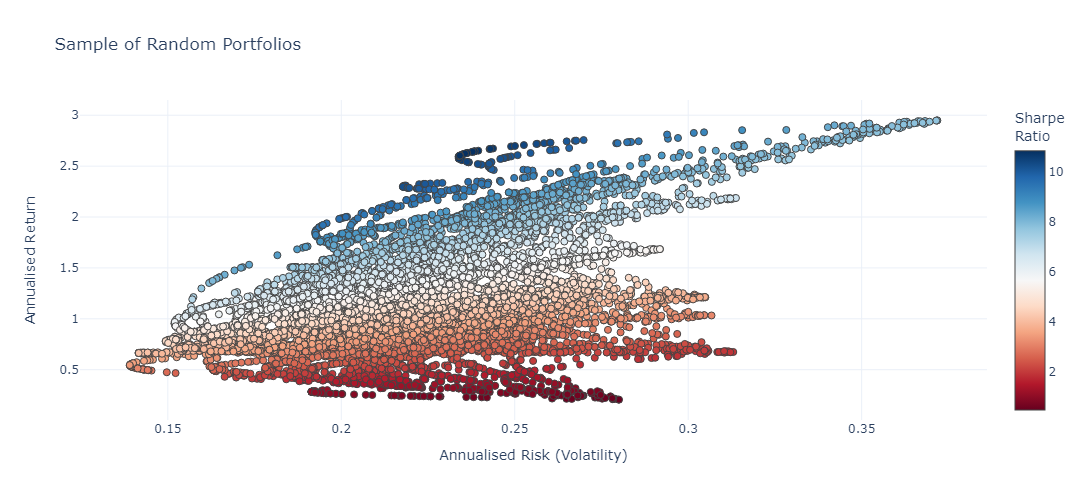

In [28]:
#-- Get annualised mean returns
mus = (1+e_daily_returns.mean())**252 - 1

#-- Get covariances
#- Multiply by 252 to annualise it (square root time for volatility but no square root for variance)
#- Note: 252 trading days in a year
#- https://quant.stackexchange.com/questions/4753/annualized-covariance
cov = e_daily_returns.cov()*252

#- How many assests to include in each portfolio
n_assets = 2
#-- How many portfolios to generate
n_portfolios = 10000

#-- Initialize empty list to store mean-variance pairs for plotting
mean_variance_pairs = []

np.random.seed(75)
#-- Loop through and generate lots of random portfolios
for i in range(n_portfolios):
    #- Choose assets randomly without replacement
    assets = np.random.choice(list(e_daily_returns.columns), n_assets, replace=False)
    #- Choose weights randomly
    weights = np.random.rand(n_assets)
    #- Ensure weights sum to 1
    weights = weights/sum(weights)

    #-- Loop over asset pairs and compute portfolio return and variance
    #- https://quant.stackexchange.com/questions/43442/portfolio-variance-explanation-for-equation-investments-by-zvi-bodie
    portfolio_E_Variance = 0
    portfolio_E_Return = 0
    for i in range(len(assets)):
        portfolio_E_Return += weights[i] * mus.loc[assets[i]]
        for j in range(len(assets)):
            #-- Add variance/covariance for each asset pair
            #- Note that when i==j this adds the variance
            portfolio_E_Variance += weights[i] * weights[j] * cov.loc[assets[i], assets[j]]
            
    #-- Add the mean/variance pairs to a list for plotting
    mean_variance_pairs.append([portfolio_E_Return, portfolio_E_Variance])

#-- Plot the risk vs. return of randomly generated portfolios
#-- Convert the list from before into an array for easy plotting
mean_variance_pairs = np.array(mean_variance_pairs)

risk_free_rate=0.07 #-- Include risk free rate here

fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:,1]**0.5, y=mean_variance_pairs[:,0], 
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers'))
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Annualised Risk (Volatility)'),
                  yaxis=dict(title='Annualised Return'),
                  title='Sample of Random Portfolios',
                  width=850,
                  height=500)
fig.update_xaxes(range=[0.18, 0.32])
fig.update_yaxes(range=[0.02,0.27])
fig.update_layout(coloraxis_colorbar=dict(title="Sharpe Ratio"))

100%|██████████| 10000/10000 [00:02<00:00, 3821.16it/s]


245
    Portfolio Name                        Stocks     Weights
0      Portfolio 1                M&M.NS, BEL.NS  0.67, 0.33
1      Portfolio 2         TATAMOTORS.NS, HAL.NS  0.35, 0.65
2      Portfolio 3      INDIGO.NS, JINDALSTEL.NS  0.72, 0.28
3      Portfolio 4             ZOMATO.NS, BEL.NS  0.55, 0.45
4      Portfolio 5     HEROMOTOCO.NS, SIEMENS.NS  0.48, 0.52
..             ...                           ...         ...
240  Portfolio 241  TATAMTRDVR.NS, BAJAJ-AUTO.NS  0.40, 0.60
241  Portfolio 242    BOSCHLTD.NS, BHARTIARTL.NS  0.43, 0.57
242  Portfolio 243      TATAMTRDVR.NS, ZOMATO.NS  0.30, 0.70
243  Portfolio 244      ZOMATO.NS, BAJAJ-AUTO.NS  0.43, 0.57
244  Portfolio 245       TRENT.NS, TATAMTRDVR.NS  0.44, 0.56

[245 rows x 3 columns]


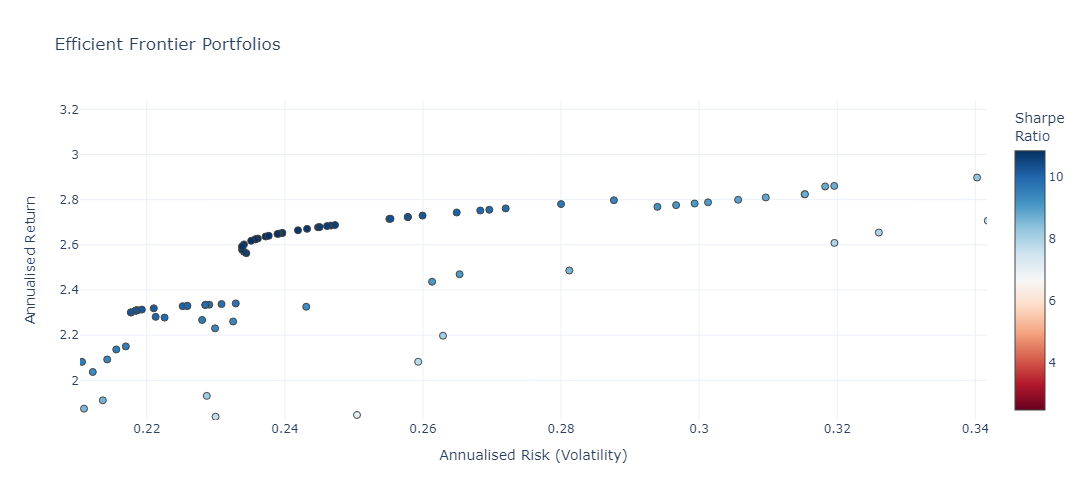

In [29]:
#-- Create random portfolio weights and indexes
#- How many assests in the portfolio
n_assets = 2

mean_variance_pairs = []
weights_list=[]
tickers_list=[]

for i in tqdm(range(10000)):
    next_i = False
    while True:
        #- Choose assets randomly without replacement
        assets = np.random.choice(list(e_daily_returns.columns), n_assets, replace=False)
        #- Choose weights randomly ensuring they sum to one
        weights = np.random.rand(n_assets)
        weights = weights/sum(weights)

        #-- Loop over asset pairs and compute portfolio return and variance
        portfolio_E_Variance = 0
        portfolio_E_Return = 0
        for i in range(len(assets)):
            portfolio_E_Return += weights[i] * mus.loc[assets[i]]
            for j in range(len(assets)):
                portfolio_E_Variance += weights[i] * weights[j] * cov.loc[assets[i], assets[j]]

        #-- Skip over dominated portfolios
        for R,V in mean_variance_pairs:
            if (R > portfolio_E_Return) & (V < portfolio_E_Variance):
                next_i = True
                break
        if next_i:
            break

        #-- Add the mean/variance pairs to a list for plotting
        mean_variance_pairs.append([portfolio_E_Return, portfolio_E_Variance])
        weights_list.append(weights)
        tickers_list.append(assets)
        break

print (len(mean_variance_pairs))

import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Convert the list from before into an array for easy plotting
mean_variance_pairs = np.array(mean_variance_pairs)

risk_free_rate = 0.07

# Create lists to store portfolio information
stocks_in_portfolios = []
weights_in_portfolios = []
portfolio_names = []  # List to store portfolio names

# Iterate through each portfolio
for i in range(len(tickers_list)):
    # Extract stocks and their weightage for the portfolio
    assets = tickers_list[i]
    weights = weights_list[i]
    
    # Append to the lists
    stocks_in_portfolios.append(", ".join([asset.split(":")[0] for asset in assets]))  # Extracting only the stock names
    weights_in_portfolios.append(", ".join([f"{weight:.2f}" for weight in weights]))  # Extracting only the weights
    portfolio_names.append(f'Portfolio {i+1}')  # Assigning portfolio names

# Create DataFrame from the collected portfolio data
portfolio_df = pd.DataFrame({'Portfolio Name': portfolio_names,
                             'Stocks': stocks_in_portfolios,
                             'Weights': weights_in_portfolios})

# Print portfolio information
print(portfolio_df)

# Create the figure
fig = go.Figure()
fig.add_trace(go.Scatter(x=mean_variance_pairs[:,1]**0.5, y=mean_variance_pairs[:,0], 
                      marker=dict(color=(mean_variance_pairs[:,0]-risk_free_rate)/(mean_variance_pairs[:,1]**0.5), 
                                  showscale=True, 
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ), 
                      mode='markers',
                      text=[f"{portfolio_names[i]}<br>{str(np.array(tickers_list[i]))}<br>{str(np.array(weights_list[i]).round(2))}" for i in range(len(tickers_list))]))  # Add portfolio names to text
fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Annualised Risk (Volatility)'),
                  yaxis=dict(title='Annualised Return'),
                  title='Efficient Frontier Portfolios',
                  width=850,
                  height=500)
fig.update_xaxes(range=[0.18, 0.35])
fig.update_yaxes(range=[0.05,0.29])
fig.update_layout(coloraxis_colorbar=dict(title="Sharpe Ratio"))

# Show the figure
fig.show()


In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Define start and end dates
start_date = "2024-01-01"
end_date = "2024-05-09"

# Fetch stock data for Nifty50
nifty_data = yf.download('^NSEI', start=start_date, end=end_date)['Adj Close']

# Function to fetch historical stock data
def fetch_historical_data(stock_ticker, start_date, end_date):
    return yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']

# Function to plot portfolio growth
def plot_portfolio_growth(portfolio_name):
    # Fetch historical stock data for portfolio stocks
    portfolio_row = portfolio_df[portfolio_df['Portfolio Name'].str.lower() == portfolio_name.lower()]
    if portfolio_row.empty:
        print(f"No portfolio named '{portfolio_name}' found.")
        return
    
    weights = [float(w) for w in portfolio_row['Weights'].iloc[0].split(", ")]
    assets = portfolio_row['Stocks'].iloc[0].split(", ")
    
    # Fetch historical data for each stock in the portfolio
    stock_data = {}
    for asset in assets:
        stock_data[asset] = fetch_historical_data(asset, start_date, end_date)
    
    # Combine historical data for all stocks in the portfolio
    portfolio_data = pd.DataFrame(stock_data)
    
    # Calculate portfolio growth
    portfolio_growth = (portfolio_data.mul(weights, axis=1).sum(axis=1) / portfolio_data.mul(weights, axis=1).sum(axis=1).iloc[0] - 1) * 100
    
    # Calculate cumulative growth for Nifty50
    nifty_growth = (nifty_data / nifty_data.iloc[0] - 1) * 100

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(nifty_growth, label='NIFTY50 returns', color='black')
    plt.plot(portfolio_growth, label=f'Portfolio {portfolio_name}', color='blue')

    # Annotate the final value of each line
    final_nifty_return = nifty_growth.iloc[-1]
    final_portfolio_return = portfolio_growth.iloc[-1]
    plt.text(nifty_growth.index[-1], final_nifty_return, f'{final_nifty_return:.2f}', color='black', fontsize=12, ha='left')
    plt.text(portfolio_growth.index[-1], final_portfolio_return, f'{final_portfolio_return:.2f}', color='blue', fontsize=12, ha='left')

    plt.title(f'Portfolio {portfolio_name} Growth vs. NIFTY50')
    plt.xlabel('Date')
    plt.ylabel('Growth (%)')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Enter the portfolio number
plot_portfolio_growth('Portfolio 133')


[*********************100%%**********************]  1 of 1 completed


NameError: name 'portfolio_df' is not defined